<a href="https://colab.research.google.com/github/tamaturgo/deep_learning_classification/blob/main/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Importação

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np


Dataset

In [ ]:
dataset = keras.datasets.fashion_mnist 
((imagens_treino, label_treino), (imagens_test, label_test)) = dataset.load_data()
# Normalização
imagens_treino = imagens_treino/ float(255)
imagens_test = imagens_test / float(255)

In [ ]:
names = ['Camiseta / Top', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Blusa', 'Tênis', 'Bolsa', 'Bota']
total_class = 10

In [ ]:
len(imagens_treino)
len(imagens_test)


10000

Exploração dos dados

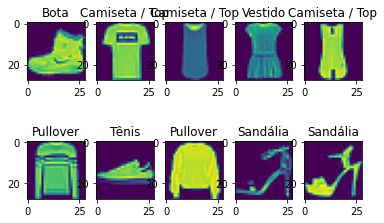

In [ ]:
for img in range(10):
  plt.subplot(2, 5, img+1)
  plt.imshow(imagens_treino[img])
  plt.title(names[label_treino[img]])

# Modelo


In [ ]:

modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(156, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(56, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

## Treino e compilação

In [ ]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

logs = modelo.fit(imagens_treino, label_treino, epochs=6, validation_split=0.2)

Epoch 1/6
1500/1500 [==============================] - 16s 10ms/step - loss: 0.6128 - accuracy: 0.7816 - val_loss: 0.4240 - val_accuracy: 0.8457
Epoch 2/6
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4489 - accuracy: 0.8403 - val_loss: 0.3966 - val_accuracy: 0.8565
Epoch 3/6
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4057 - accuracy: 0.8531 - val_loss: 0.3666 - val_accuracy: 0.8651
Epoch 4/6
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3829 - accuracy: 0.8631 - val_loss: 0.3505 - val_accuracy: 0.8745
Epoch 5/6
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3644 - accuracy: 0.8671 - val_loss: 0.3504 - val_accuracy: 0.8738
Epoch 6/6
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3514 - accuracy: 0.8723 - val_loss: 0.3595 - val_accuracy: 0.8677


## Plotando Accuracy e Loss

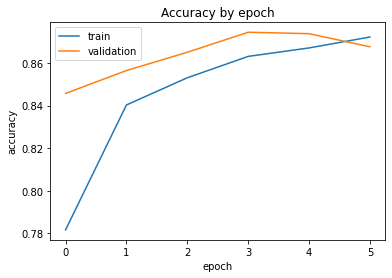

In [ ]:
plt.plot(logs.history['accuracy'])
plt.plot(logs.history['val_accuracy'])
plt.title("Accuracy by epoch")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train' , 'validation'])

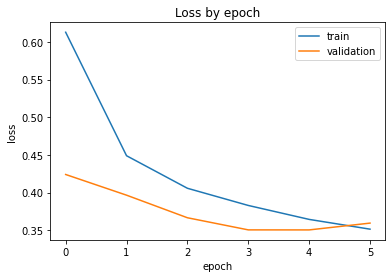

In [ ]:
plt.plot(logs.history['loss'])
plt.plot(logs.history['val_loss'])
plt.title("Loss by epoch")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train' , 'validation'])

## Testando modelo

1/1 [==============================] - 0s 25ms/step


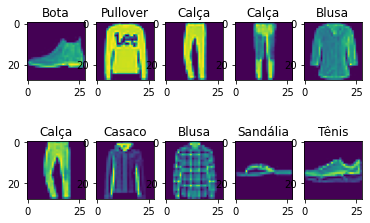

In [ ]:

#teste 
for img in range(10):
  plt.subplot(2, 5, img+1)
  plt.imshow(imagens_test[img])
  num_predict = modelo.predict(imagens_test[img])
  plt.title(names[np.argmax(num_predict)])

In [ ]:
perda_test, accuracy_test = modelo.evaluate(imagens_test, label_test)

print("Perca de ", perda_test)
print("Acerto de ", accuracy_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3859 - accuracy: 0.8593
Perca de  0.38593021035194397
Acerto de  0.8593000173568726


## Salvar e carregar modelo

In [ ]:

#modelo.save('modelo.h5')
#modelo_load = load_model('modelo.h5')

## Testando modelo carregado

1/1 [==============================] - 0s 21ms/step


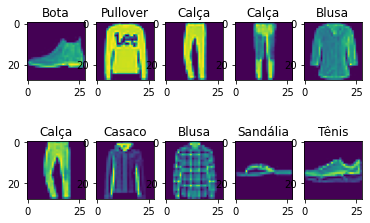

In [ ]:
#teste 
for img in range(10):
  plt.subplot(2, 5, img+1)
  plt.imshow(imagens_test[img])
  num_predict = modelo_load.predict(imagens_test[img])
  plt.title(names[np.argmax(num_predict)])


In [ ]:
test_modelo_salvo = modelo_load.predict(imagens_test)
perda_test, accuracy_test = modelo_load.evaluate(imagens_test, label_test)
print("Perca de ", perda_test)
print("Acerto de ", accuracy_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3859 - accuracy: 0.8593
Perca de  0.38593021035194397
Acerto de  0.8593000173568726
